In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
# folder_name = 'Capstone Data'

# # Function to search for the folder recursively
# def find_folder(start_dir, folder_name):
#     for root, dirs, files in os.walk(start_dir):
#         if folder_name in dirs:
#             folder_path = os.path.join(root, folder_name)
#             print(f"The path of '{folder_name}' is: {folder_path}")
        
# # Start the search from the root directory (you can specify a different directory)
# start_directory = '/'

# find_folder(start_directory, folder_name)

In [4]:
all_mines = pd.read_csv('/Users\\austi\\Documents\\Capstone\\Working\\For real\\Capstone Data\\all_mines.csv')

all_mines.head(15)

,Unnamed: 0,Company,start_date,Observations,orig_perm_id,mine_id,water,trees,grass,flooded_vegetation,...,permit_approval_date,edit_date,area_mine,contour,mountaintop,steep_slope,highwall,auger,contact,information_link
0,0,HERMITAGE COAL CO INC,2023-07-01,2,643677X,000000000000000003af,0.033055,0.732339,0.035516,0.031776,...,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
1,1,HERMITAGE COAL CO INC,2021-07-01,3,643677X,000000000000000003af,0.032022,0.732201,0.035248,0.031718,...,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
2,2,HERMITAGE COAL CO INC,2019-07-01,3,643677X,000000000000000003af,0.031924,0.729731,0.035060,0.030752,...,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
3,3,HERMITAGE COAL CO INC,2017-07-01,1,643677X,000000000000000003af,0.027800,0.732088,0.036788,0.028198,...,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
4,4,TWIN STAR CONTRACTING CO INC,2023-07-01,8,8800010,000000000000000014f0,0.031901,0.739686,0.035850,0.029958,...,1984-11-30,2000-07-26,0.0,1.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
5,5,TWIN STAR CONTRACTING CO INC,2021-07-01,8,8800010,000000000000000014f0,0.031526,0.720476,0.041571,0.030969,...,1984-11-30,2000-07-26,0.0,1.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
6,6,TWIN STAR CONTRACTING CO INC,2019-07-01,12,8800010,000000000000000014f0,0.030935,0.736410,0.037898,0.029215,...,1984-11-30,2000-07-26,0.0,1.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
7,7,TWIN STAR CONTRACTING CO INC,2017-07-01,4,8800010,000000000000000014f0,0.027513,0.726718,0.048297,0.028214,...,1984-11-30,2000-07-26,0.0,1.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
8,8,CLAUDE HALL JR,2023-07-01,1,8600062,00000000000000000df1,0.032474,0.738027,0.033500,0.030845,...,1983-07-01,2000-07-26,1.0,0.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...
9,9,CLAUDE HALL JR,2021-07-01,2,8600062,00000000000000000df1,0.033149,0.729834,0.033276,0.029471,...,1983-07-01,2000-07-26,1.0,0.0,0.0,0.0,0.0,0.0,3,https://eec.ky.gov/Natural-Resources/Mining/Pa...


In [5]:
columns_to_drop = ['Unnamed: 0', 'information_link', 'company']
all_mines = all_mines.drop(columns = columns_to_drop)


all_mines.columns

Index(['Company', 'start_date', 'Observations', 'orig_perm_id', 'mine_id',
       'water', 'trees', 'grass', 'flooded_vegetation', 'crops',
       'shrub_and_scrub', 'built', 'bare', 'snow_and_ice',
       'coalmine_op_status', 'mine_name', 'permit_id', 'state_tribe_mine_id',
       'national_id', 'coal_bed_names', 'inspectable_unit_status',
       'post_smcra', 'calculated_area', 'reported_area',
       'permit_application_type', 'permit_application_date',
       'permit_approval_date', 'edit_date', 'area_mine', 'contour',
       'mountaintop', 'steep_slope', 'highwall', 'auger', 'contact'],
      dtype='object')

In [6]:
all_mines

,Company,start_date,Observations,orig_perm_id,mine_id,water,trees,grass,flooded_vegetation,crops,...,permit_application_date,permit_approval_date,edit_date,area_mine,contour,mountaintop,steep_slope,highwall,auger,contact
0,HERMITAGE COAL CO INC,2023-07-01,2,643677X,000000000000000003af,0.033055,0.732339,0.035516,0.031776,0.029436,...,NaN,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3
1,HERMITAGE COAL CO INC,2021-07-01,3,643677X,000000000000000003af,0.032022,0.732201,0.035248,0.031718,0.032432,...,NaN,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3
2,HERMITAGE COAL CO INC,2019-07-01,3,643677X,000000000000000003af,0.031924,0.729731,0.035060,0.030752,0.030231,...,NaN,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3
3,HERMITAGE COAL CO INC,2017-07-01,1,643677X,000000000000000003af,0.027800,0.732088,0.036788,0.028198,0.029672,...,NaN,1977-11-17,2000-07-26,0.0,0.0,0.0,0.0,0.0,0.0,3
4,TWIN STAR CONTRACTING CO INC,2023-07-01,8,8800010,000000000000000014f0,0.031901,0.739686,0.035850,0.029958,0.030949,...,NaN,1984-11-30,2000-07-26,0.0,1.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,"J. D. CA-MONT MINING, INC",2017-07-01,5,S505786,000000000000000003ec,0.036968,0.162188,0.113633,0.045511,0.082891,...,NaN,1987-04-07,NaN,1.0,0.0,0.0,0.0,NaN,0.0,2
2384,"COAL-MAC, INC. DBA PHOENIX COAL-MAC MINING, INC.",2019-07-01,78,S009780,00000000000000000751,0.029150,0.605033,0.079829,0.029700,0.049988,...,NaN,1980-10-02,NaN,1.0,1.0,1.0,0.0,NaN,0.0,2
2385,"COAL-MAC, INC. DBA PHOENIX COAL-MAC MINING, INC.",2017-07-01,33,S009780,00000000000000000751,0.027459,0.611899,0.076052,0.027418,0.058520,...,NaN,1980-10-02,NaN,1.0,1.0,1.0,0.0,NaN,0.0,2
2386,COBRA NATURAL RESOURCES LLC,2019-07-01,2,U400701,00000000000000000218,0.030404,0.729800,0.036398,0.027109,0.033903,...,NaN,2002-06-19,NaN,0.0,0.0,0.0,0.0,NaN,0.0,2


In [7]:
all_mines.dtypes

Company                     object
start_date                  object
Observations                 int64
orig_perm_id                object
mine_id                     object
water                      float64
trees                      float64
grass                      float64
flooded_vegetation         float64
crops                      float64
shrub_and_scrub            float64
built                      float64
bare                       float64
snow_and_ice               float64
coalmine_op_status           int64
mine_name                   object
permit_id                   object
state_tribe_mine_id        float64
national_id                 object
coal_bed_names              object
inspectable_unit_status    float64
post_smcra                 float64
calculated_area            float64
reported_area              float64
permit_application_type    float64
permit_application_date    float64
permit_approval_date        object
edit_date                   object
area_mine           

In [8]:
for column_name, dtype in all_mines.dtypes.items():
    if dtype == 'object':
        column_values = all_mines[column_name]
        
        num_unique_values = column_values.nunique()
        
        print(f'Column: {column_name}')
        print(f'Number of Unique Values: {num_unique_values}\n')
        value_counts = column_values.value_counts()
        print(value_counts)
        print('-------------------------------------------\n')


Column: Company
Number of Unique Values: 477

Company
NATIONAL COAL CORPORATION         36
JOHNSON-FLOYD COAL COMPANY LLC    28
SEQUATCHIE VALLEY COAL CORP       24
MANALAPAN MINING COMPANY INC      24
N A L R COAL CORPORATION          24
                                  ..
WHITE OAK COAL CORP                1
MCCOY ELKHORN COAL CORPORATION     1
QUADRANGLE COAL CO                 1
JOHNS CREEK ELKHORN COAL CORP      1
MAC MINING CO                      1
Name: count, Length: 477, dtype: int64
-------------------------------------------

Column: start_date
Number of Unique Values: 5

start_date
2021-07-01    651
2019-07-01    645
2023-07-01    643
2017-07-01    397
2016-07-01     52
Name: count, dtype: int64
-------------------------------------------

Column: orig_perm_id
Number of Unique Values: 622

orig_perm_id
8770133    10
8365471    10
8670401    10
8480161     8
8580173     8
           ..
438275X     1
709677X     1
2183092     1
2183070     1
2985097     1
Name: count, Lengt

In [9]:
columns_to_encode = ['Company', 'start_date', 'mine_name', 'permit_id',
                     'coal_bed_names']

all_mines_encoded = pd.get_dummies(all_mines, columns=columns_to_encode)

all_mines_encoded

,Observations,orig_perm_id,mine_id,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,...,coal_bed_names_WHITESBURG,"coal_bed_names_WHITESBURG, FIRECLAY","coal_bed_names_WHITESBURG, HAZARD 8, HAZARD 9, HAZARD 10","coal_bed_names_WILLIAMSBURG, WHITESBURG",coal_bed_names_WILLIAMSON,"coal_bed_names_WINIFREDE, HIGHSPLINT R, HIGHSPLINT, MIDDLESPLINT, LOWSPLINT, LOWSPLINT B","coal_bed_names_WINIFREDE, WINIFREDE RIDER",coal_bed_names_XXX,coal_bed_names_XXXX,coal_bed_names_XXXXX
0,2,643677X,000000000000000003af,0.033055,0.732339,0.035516,0.031776,0.029436,0.037524,0.028389,...,False,False,False,False,False,False,False,False,False,False
1,3,643677X,000000000000000003af,0.032022,0.732201,0.035248,0.031718,0.032432,0.034362,0.030339,...,False,False,False,False,False,False,False,False,False,False
2,3,643677X,000000000000000003af,0.031924,0.729731,0.035060,0.030752,0.030231,0.038577,0.032222,...,False,False,False,False,False,False,False,False,False,False
3,1,643677X,000000000000000003af,0.027800,0.732088,0.036788,0.028198,0.029672,0.041919,0.034933,...,False,False,False,False,False,False,False,False,False,False
4,8,8800010,000000000000000014f0,0.031901,0.739686,0.035850,0.029958,0.030949,0.034358,0.027473,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,5,S505786,000000000000000003ec,0.036968,0.162188,0.113633,0.045511,0.082891,0.113932,0.238699,...,False,False,False,False,False,False,False,False,False,False
2384,78,S009780,00000000000000000751,0.029150,0.605033,0.079829,0.029700,0.049988,0.089551,0.031343,...,False,False,False,False,False,False,False,False,False,False
2385,33,S009780,00000000000000000751,0.027459,0.611899,0.076052,0.027418,0.058520,0.085209,0.032626,...,False,False,False,False,False,False,False,False,False,False
2386,2,U400701,00000000000000000218,0.030404,0.729800,0.036398,0.027109,0.033903,0.040259,0.033027,...,False,False,False,False,False,False,False,False,False,False


In [10]:
for column_name in all_mines_encoded.columns:
    if all_mines_encoded[column_name].dtype == 'int64':
        all_mines_encoded[column_name] = all_mines_encoded[column_name].astype('float32')
        
all_mines_encoded

,Observations,orig_perm_id,mine_id,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,...,coal_bed_names_WHITESBURG,"coal_bed_names_WHITESBURG, FIRECLAY","coal_bed_names_WHITESBURG, HAZARD 8, HAZARD 9, HAZARD 10","coal_bed_names_WILLIAMSBURG, WHITESBURG",coal_bed_names_WILLIAMSON,"coal_bed_names_WINIFREDE, HIGHSPLINT R, HIGHSPLINT, MIDDLESPLINT, LOWSPLINT, LOWSPLINT B","coal_bed_names_WINIFREDE, WINIFREDE RIDER",coal_bed_names_XXX,coal_bed_names_XXXX,coal_bed_names_XXXXX
0,2.0,643677X,000000000000000003af,0.033055,0.732339,0.035516,0.031776,0.029436,0.037524,0.028389,...,False,False,False,False,False,False,False,False,False,False
1,3.0,643677X,000000000000000003af,0.032022,0.732201,0.035248,0.031718,0.032432,0.034362,0.030339,...,False,False,False,False,False,False,False,False,False,False
2,3.0,643677X,000000000000000003af,0.031924,0.729731,0.035060,0.030752,0.030231,0.038577,0.032222,...,False,False,False,False,False,False,False,False,False,False
3,1.0,643677X,000000000000000003af,0.027800,0.732088,0.036788,0.028198,0.029672,0.041919,0.034933,...,False,False,False,False,False,False,False,False,False,False
4,8.0,8800010,000000000000000014f0,0.031901,0.739686,0.035850,0.029958,0.030949,0.034358,0.027473,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,5.0,S505786,000000000000000003ec,0.036968,0.162188,0.113633,0.045511,0.082891,0.113932,0.238699,...,False,False,False,False,False,False,False,False,False,False
2384,78.0,S009780,00000000000000000751,0.029150,0.605033,0.079829,0.029700,0.049988,0.089551,0.031343,...,False,False,False,False,False,False,False,False,False,False
2385,33.0,S009780,00000000000000000751,0.027459,0.611899,0.076052,0.027418,0.058520,0.085209,0.032626,...,False,False,False,False,False,False,False,False,False,False
2386,2.0,U400701,00000000000000000218,0.030404,0.729800,0.036398,0.027109,0.033903,0.040259,0.033027,...,False,False,False,False,False,False,False,False,False,False


In [11]:
object_columns = all_mines_encoded.select_dtypes(include=['object'])

all_mines_encoded = all_mines_encoded.drop(columns=object_columns.columns)

all_mines_encoded

,Observations,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,...,coal_bed_names_WHITESBURG,"coal_bed_names_WHITESBURG, FIRECLAY","coal_bed_names_WHITESBURG, HAZARD 8, HAZARD 9, HAZARD 10","coal_bed_names_WILLIAMSBURG, WHITESBURG",coal_bed_names_WILLIAMSON,"coal_bed_names_WINIFREDE, HIGHSPLINT R, HIGHSPLINT, MIDDLESPLINT, LOWSPLINT, LOWSPLINT B","coal_bed_names_WINIFREDE, WINIFREDE RIDER",coal_bed_names_XXX,coal_bed_names_XXXX,coal_bed_names_XXXXX
0,2.0,0.033055,0.732339,0.035516,0.031776,0.029436,0.037524,0.028389,0.037602,0.034282,...,False,False,False,False,False,False,False,False,False,False
1,3.0,0.032022,0.732201,0.035248,0.031718,0.032432,0.034362,0.030339,0.036213,0.035230,...,False,False,False,False,False,False,False,False,False,False
2,3.0,0.031924,0.729731,0.035060,0.030752,0.030231,0.038577,0.032222,0.038159,0.033233,...,False,False,False,False,False,False,False,False,False,False
3,1.0,0.027800,0.732088,0.036788,0.028198,0.029672,0.041919,0.034933,0.035997,0.032348,...,False,False,False,False,False,False,False,False,False,False
4,8.0,0.031901,0.739686,0.035850,0.029958,0.030949,0.034358,0.027473,0.035245,0.034346,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,5.0,0.036968,0.162188,0.113633,0.045511,0.082891,0.113932,0.238699,0.067050,0.097129,...,False,False,False,False,False,False,False,False,False,False
2384,78.0,0.029150,0.605033,0.079829,0.029700,0.049988,0.089551,0.031343,0.031455,0.034799,...,False,False,False,False,False,False,False,False,False,False
2385,33.0,0.027459,0.611899,0.076052,0.027418,0.058520,0.085209,0.032626,0.031045,0.034102,...,False,False,False,False,False,False,False,False,False,False
2386,2.0,0.030404,0.729800,0.036398,0.027109,0.033903,0.040259,0.033027,0.035884,0.032786,...,False,False,False,False,False,False,False,False,False,False


In [12]:
all_mines_encoded = all_mines_encoded.replace({True: 1, False: 0})

all_mines_encoded

,Observations,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,...,coal_bed_names_WHITESBURG,"coal_bed_names_WHITESBURG, FIRECLAY","coal_bed_names_WHITESBURG, HAZARD 8, HAZARD 9, HAZARD 10","coal_bed_names_WILLIAMSBURG, WHITESBURG",coal_bed_names_WILLIAMSON,"coal_bed_names_WINIFREDE, HIGHSPLINT R, HIGHSPLINT, MIDDLESPLINT, LOWSPLINT, LOWSPLINT B","coal_bed_names_WINIFREDE, WINIFREDE RIDER",coal_bed_names_XXX,coal_bed_names_XXXX,coal_bed_names_XXXXX
0,2.0,0.033055,0.732339,0.035516,0.031776,0.029436,0.037524,0.028389,0.037602,0.034282,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0.032022,0.732201,0.035248,0.031718,0.032432,0.034362,0.030339,0.036213,0.035230,...,0,0,0,0,0,0,0,0,0,0
2,3.0,0.031924,0.729731,0.035060,0.030752,0.030231,0.038577,0.032222,0.038159,0.033233,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.027800,0.732088,0.036788,0.028198,0.029672,0.041919,0.034933,0.035997,0.032348,...,0,0,0,0,0,0,0,0,0,0
4,8.0,0.031901,0.739686,0.035850,0.029958,0.030949,0.034358,0.027473,0.035245,0.034346,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,5.0,0.036968,0.162188,0.113633,0.045511,0.082891,0.113932,0.238699,0.067050,0.097129,...,0,0,0,0,0,0,0,0,0,0
2384,78.0,0.029150,0.605033,0.079829,0.029700,0.049988,0.089551,0.031343,0.031455,0.034799,...,0,0,0,0,0,0,0,0,0,0
2385,33.0,0.027459,0.611899,0.076052,0.027418,0.058520,0.085209,0.032626,0.031045,0.034102,...,0,0,0,0,0,0,0,0,0,0
2386,2.0,0.030404,0.729800,0.036398,0.027109,0.033903,0.040259,0.033027,0.035884,0.032786,...,0,0,0,0,0,0,0,0,0,0


In [13]:
nan_count = all_mines_encoded.isna().sum()

nan_count_sorted = nan_count.sort_values(ascending=False)

print(nan_count_sorted.head(12))

permit_application_date    2388
permit_application_type    2388
reported_area              2388
state_tribe_mine_id        2388
highwall                    282
steep_slope                 259
contour                     259
area_mine                   259
auger                       259
mountaintop                 259
inspectable_unit_status      26
permit_id_8360060             0
dtype: int64


In [14]:
missing_data = all_mines_encoded[['permit_application_date', 'permit_application_type', 'reported_area',              
                                 'state_tribe_mine_id', 'highwall', 'steep_slope', 'contour',                     
                                 'area_mine', 'auger', 'mountaintop', 'inspectable_unit_status', 'permit_id_8360060']]

missing_data.head(25)

,permit_application_date,permit_application_type,reported_area,state_tribe_mine_id,highwall,steep_slope,contour,area_mine,auger,mountaintop,inspectable_unit_status,permit_id_8360060
0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
2,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
5,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
6,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
7,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
8,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
9,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0


In [15]:
# drop these columns 
all_mines_encoded_droptest = all_mines_encoded.drop(['permit_application_date', 'permit_application_type', 
                                                    'reported_area', 'state_tribe_mine_id'], axis = 1)

all_mines_encoded_droptest


# Impute with mode for these columns 
columns_to_impute_with_mode = ['highwall', 'steep_slope', 'contour', 'area_mine', 
                               'auger', 'mountaintop', 'inspectable_unit_status', 'permit_id_8360060']

all_mines_encoded_droptest[columns_to_impute_with_mode] = all_mines_encoded_droptest[columns_to_impute_with_mode].fillna(all_mines_encoded_droptest[columns_to_impute_with_mode].mode().iloc[0])

nan_count = all_mines_encoded_droptest.isna().sum()

nan_count_sorted = nan_count.sort_values(ascending=False)

print(nan_count_sorted.head(12))

Observations         0
permit_id_8325004    0
permit_id_8360106    0
permit_id_8360090    0
permit_id_8360075    0
permit_id_8360072    0
permit_id_8360070    0
permit_id_8360069    0
permit_id_8360060    0
permit_id_8360054    0
permit_id_8360020    0
permit_id_8360019    0
dtype: int64


In [16]:
##### TESTING DROPSET

column_to_exclude = 'trees'

selected_columns = all_mines_encoded_droptest.columns[all_mines_encoded_droptest.columns != column_to_exclude]

features = all_mines_encoded_droptest[selected_columns]
target = all_mines_encoded_droptest['trees']

X, y = [], []


sequence_length = 10

for i in range(len(features) - sequence_length):
    X.append(features.iloc[i:i + sequence_length].values)
    y.append(target.iloc[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)


In [21]:
model = Sequential()

model.add(SimpleRNN(units=32,
                    input_shape=(sequence_length, X_train.shape[2])))

model.add(Dense(units=1, activation='relu'))

model.compile(optimizer='adam',
              loss='mean_squared_error')


In [22]:
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/10
60/60 [==============================] - 29s 452ms/step - loss: 0.1116 - val_loss: 0.0224
Epoch 2/10
60/60 [==============================] - 27s 457ms/step - loss: 0.0167 - val_loss: 0.0151
Epoch 3/10
60/60 [==============================] - 27s 459ms/step - loss: 0.0110 - val_loss: 0.0168
Epoch 4/10
60/60 [==============================] - 27s 458ms/step - loss: 0.0093 - val_loss: 0.0150
Epoch 5/10
60/60 [==============================] - 27s 459ms/step - loss: 0.0098 - val_loss: 0.0139
Epoch 6/10
60/60 [==============================] - 28s 464ms/step - loss: 0.0085 - val_loss: 0.0142
Epoch 7/10
60/60 [==============================] - 28s 469ms/step - loss: 0.0071 - val_loss: 0.0145
Epoch 8/10
60/60 [==============================] - 27s 443ms/step - loss: 0.0068 - val_loss: 0.0142
Epoch 9/10
60/60 [==============================] - 28s 466ms/step - loss: 0.0060 - val_loss: 0.0151
Epoch 10/10
60/60 [==============================] - 28s 471ms/step - loss: 0.0057 - val_lo

In [23]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)


# good MSE and MAE but R2 should be postive... weird
# Mean Squared Error (MSE): 0.015279539114813404
# Mean Absolute Error (MAE): 0.08809685749592835
# R-squared (R^2): -0.24044608185500627

15/15 [==============================] - 6s 348ms/step

Mean Squared Error (MSE): 0.015731808789226153
Mean Absolute Error (MAE): 0.09142602974625351
R-squared (R^2): -0.2771629056643863


In [42]:
##### TESTING STUFF 

column_to_exclude = 'trees'

selected_columns = all_mines_encoded_droptest.columns[all_mines_encoded_droptest.columns != column_to_exclude]

features = all_mines_encoded_droptest[selected_columns]
target = all_mines_encoded_droptest['trees']

X, y = [], []


sequence_length = 10

for i in range(len(features) - sequence_length):
    X.append(features.iloc[i:i + sequence_length].values)
    y.append(target.iloc[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)



In [96]:
regressor = Sequential()


regressor.add(LSTM(units = 32, 
                    input_shape=(sequence_length, X_train.shape[2]),
                  return_sequences = True,
                  activation = 'relu'))
regressor.add(Dropout(0.2))



regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.2))



In [97]:
regressor.add(Dense(units = 1))

In [98]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [119]:
# Takes about 15 min for 50 epochs... dont think we need that many... maybe 25?

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
60/60 [==============================] - 15s 249ms/step - loss: 0.0040
Epoch 2/50
60/60 [==============================] - 17s 283ms/step - loss: 0.0038
Epoch 3/50
60/60 [==============================] - 18s 296ms/step - loss: 0.0036
Epoch 4/50
60/60 [==============================] - 17s 288ms/step - loss: 0.0041
Epoch 5/50
60/60 [==============================] - 17s 282ms/step - loss: 0.0038
Epoch 6/50
60/60 [==============================] - 19s 308ms/step - loss: 0.0037
Epoch 7/50
60/60 [==============================] - 18s 306ms/step - loss: 0.0036
Epoch 8/50
60/60 [==============================] - 17s 291ms/step - loss: 0.0036
Epoch 9/50
60/60 [==============================] - 17s 279ms/step - loss: 0.0036
Epoch 10/50
60/60 [==============================] - 18s 298ms/step - loss: 0.0033
Epoch 11/50
60/60 [==============================] - 17s 277ms/step - loss: 0.0037
Epoch 12/50
60/60 [==============================] - 18s 296ms/step - loss: 0.0031
Epoch 13/50
6

In [120]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)

15/15 [==============================] - 4s 287ms/step

Mean Squared Error (MSE): 0.007094013694162523
Mean Absolute Error (MAE): 0.04902791071527329
R-squared (R^2): 0.4240833165564285


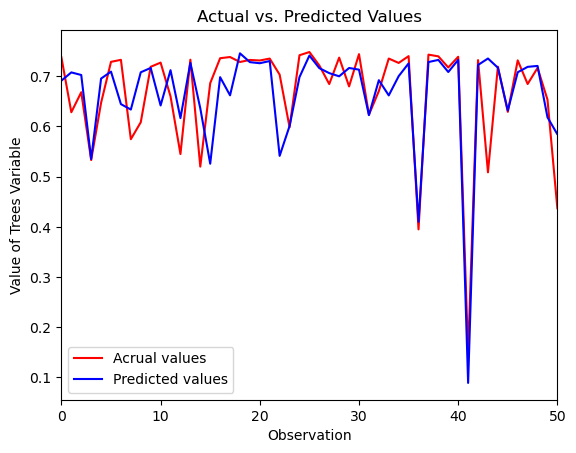

In [121]:
plt.plot(y_test, 
         color = 'red',
         label = 'Acrual values')

plt.plot(y_pred,
         color = 'blue', 
         label = 'Predicted values')

plt.legend()
plt.xlim(0, 50) # change to see everything
plt.title('Actual vs. Predicted Values')
plt.xlabel('Observation')
plt.ylabel('Value of Trees Variable')

plt.show()

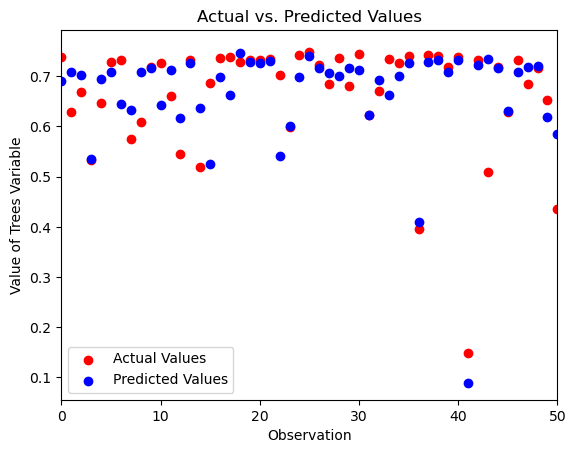

In [122]:
plt.scatter(range(len(y_test)), 
            y_test, 
            color = 'red', 
            label = 'Actual Values')

plt.scatter(range(len(y_pred)),
            y_pred,
            color = 'blue',
            label = 'Predicted Values')

plt.legend()
plt.title('Actual vs. Predicted Values')
plt.xlim(0, 50) # change to see everything
plt.xlabel('Observation')
plt.ylabel('Value of Trees Variable')

plt.show()


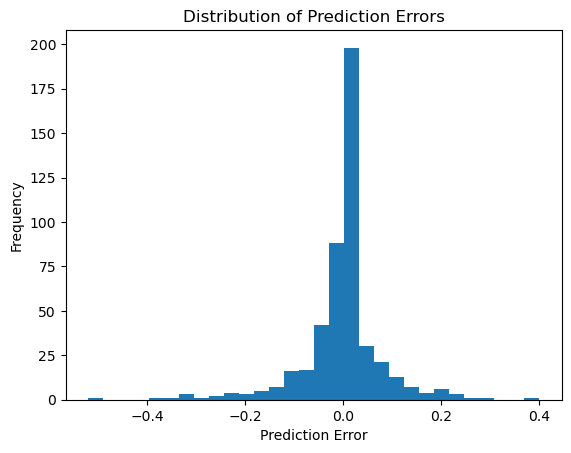

In [123]:
error = y_test - y_pred.flatten()
plt.hist(error, bins = 30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')

plt.show()

# stack overflow
# A symmetric and narrow distribution around zero 
# indicates better prediction accuracy.

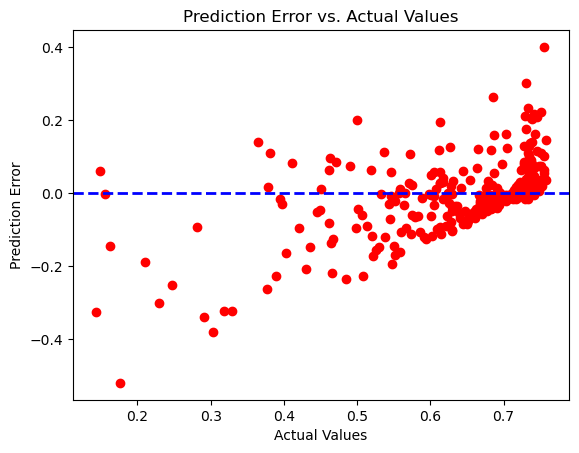

In [124]:
plt.scatter(y_test, error, color = 'red')
plt.axhline(y = 0, 
            color = 'blue',
            linestyle = '--', 
            linewidth = 2)

plt.xlabel('Actual Values')
plt.ylabel('Prediction Error')
plt.title('Prediction Error vs. Actual Values')

plt.show()


In [ ]:
# do we need to scale the data??